In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [31]:
df = pd.read_csv("Crop_recommendation.csv")

In [32]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [33]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [34]:
X = df.drop("label", axis=1)
y = df["label"]


In [35]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [38]:
model = Sequential([
    Dense(128, input_shape=(X.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Output neurons = number of crops
])

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)


Epoch 1/50
99/99 [==============================] - 1s 8ms/step - loss: 2.4091 - accuracy: 0.3952 - val_loss: 1.3657 - val_accuracy: 0.6364
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 0.8115 - accuracy: 0.7765 - val_loss: 0.5073 - val_accuracy: 0.8352
Epoch 3/50
99/99 [==============================] - 0s 4ms/step - loss: 0.3224 - accuracy: 0.9135 - val_loss: 0.2651 - val_accuracy: 0.9205
Epoch 4/50
99/99 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.9482 - val_loss: 0.2134 - val_accuracy: 0.9261
Epoch 5/50
99/99 [==============================] - 0s 5ms/step - loss: 0.1415 - accuracy: 0.9596 - val_loss: 0.1397 - val_accuracy: 0.9602
Epoch 6/50
99/99 [==============================] - 0s 5ms/step - loss: 0.1170 - accuracy: 0.9659 - val_loss: 0.1490 - val_accuracy: 0.9489
Epoch 7/50
99/99 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.9710 - val_loss: 0.0968 - val_accuracy: 0.9602
Epoch 8/50
99/99 [==

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

14/14 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9750
Test Accuracy: 97.50%


In [42]:
y_pred = model.predict(X_test)
predicted_classes = le.inverse_transform(np.argmax(y_pred, axis=1))

14/14 [==============================] - 0s 2ms/step


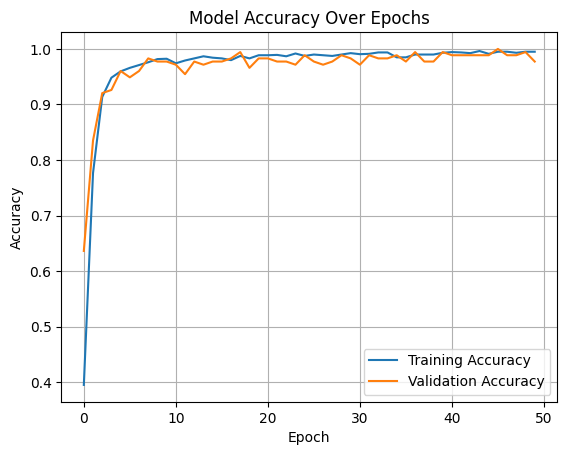

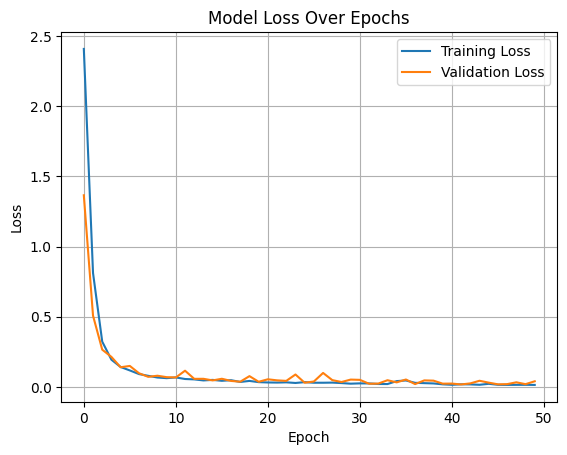

In [43]:
import matplotlib.pyplot as plt


# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
# Predict on X_test (seen data)
y_pred_test = model.predict(X_test)
pred_classes = le.inverse_transform(np.argmax(y_pred_test, axis=1))
actual_classes = le.inverse_transform(np.argmax(y_test, axis=1))

# Display first 10 predictions vs actual
for i in range(10):
    print(f"Actual: {actual_classes[i]}  ---> Predicted: {pred_classes[i]}")


14/14 [==============================] - 0s 2ms/step
Actual: muskmelon  ---> Predicted: muskmelon
Actual: watermelon  ---> Predicted: watermelon
Actual: papaya  ---> Predicted: papaya
Actual: papaya  ---> Predicted: papaya
Actual: apple  ---> Predicted: apple
Actual: mango  ---> Predicted: mango
Actual: apple  ---> Predicted: apple
Actual: mothbeans  ---> Predicted: mothbeans
Actual: mungbean  ---> Predicted: mungbean
Actual: lentil  ---> Predicted: lentil


In [49]:
# Example custom input (replace values as needed)
custom_input = np.array([[90, 42, 43, 20.5, 82.0, 6.5, 200]])  # N,P,K,temp,humidity,ph,rainfall

# Scale input using the same scaler
custom_scaled = scaler.transform(custom_input)

# Predict
custom_pred = model.predict(custom_scaled)
predicted_crop = le.inverse_transform([np.argmax(custom_pred)])
print("Recommended Crop:", predicted_crop[0])


1/1 [==============================] - 0s 48ms/step
Recommended Crop: rice


c:\Users\Farhan Bukhari\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
model.save("crop_recommendation_model.h5")